In [49]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_wine
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, f1_score
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

In [2]:
data = load_wine()
df = pd.DataFrame(data=data.data, columns=data.feature_names)
df['target'] = data.target
df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


In [3]:
X = df.drop('target', axis=1)
y = df['target']

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [5]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

In [6]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {round(accuracy, 2)}")

Accuracy: 0.74


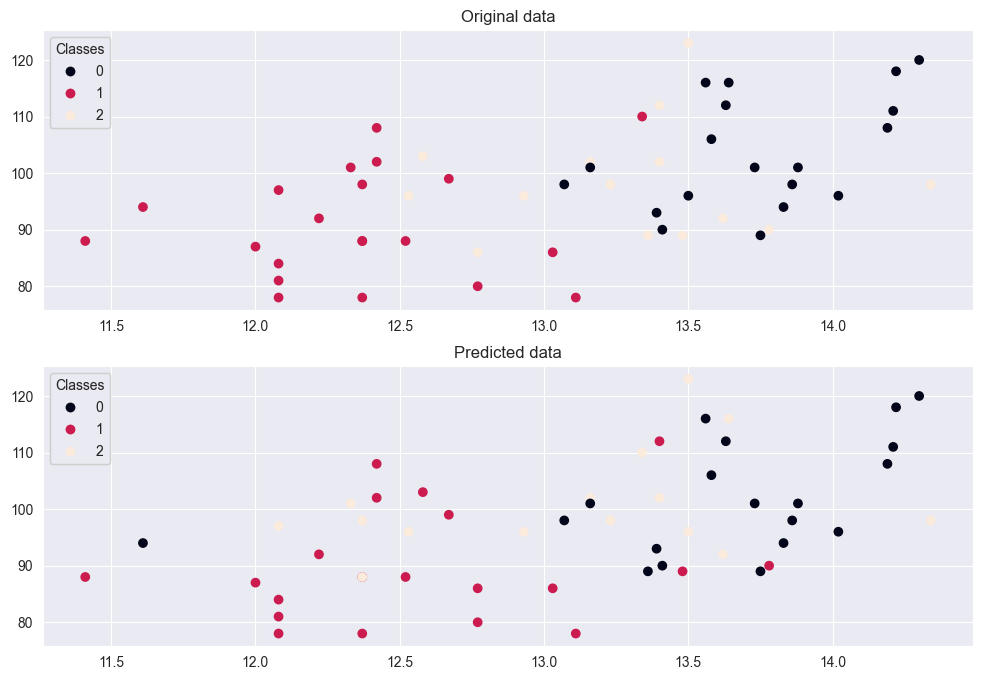

In [7]:
fig, axs = plt.subplots(2, 1, figsize=(12, 8))
scatter_0 = axs[0].scatter(X_test['alcohol'], X_test['magnesium'], c=y_test)
axs[0].set_title('Original data')
legend0 = axs[0].legend(*scatter_0.legend_elements(), title="Classes")
axs[0].add_artist(legend0)
scatter_1 = axs[1].scatter(X_test['alcohol'], X_test['magnesium'], c=y_pred)
axs[1].set_title('Predicted data')
legend1 = axs[1].legend(*scatter_1.legend_elements(), title="Classes")
axs[1].add_artist(legend1);

In [8]:
X_scale = StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scale, y, test_size=0.3, random_state=25)

In [9]:
svm_classifier = SVC(kernel='poly')
svm_classifier.fit(X_train, y_train)
y_pred = svm_classifier.predict(X_test)

In [10]:
precision, recall, _, _ = precision_recall_fscore_support(y_test, y_pred, average='micro')
print(f"Precision: {round(precision, 2)}, Recall: {round(recall, 2)}")

Precision: 0.96, Recall: 0.96


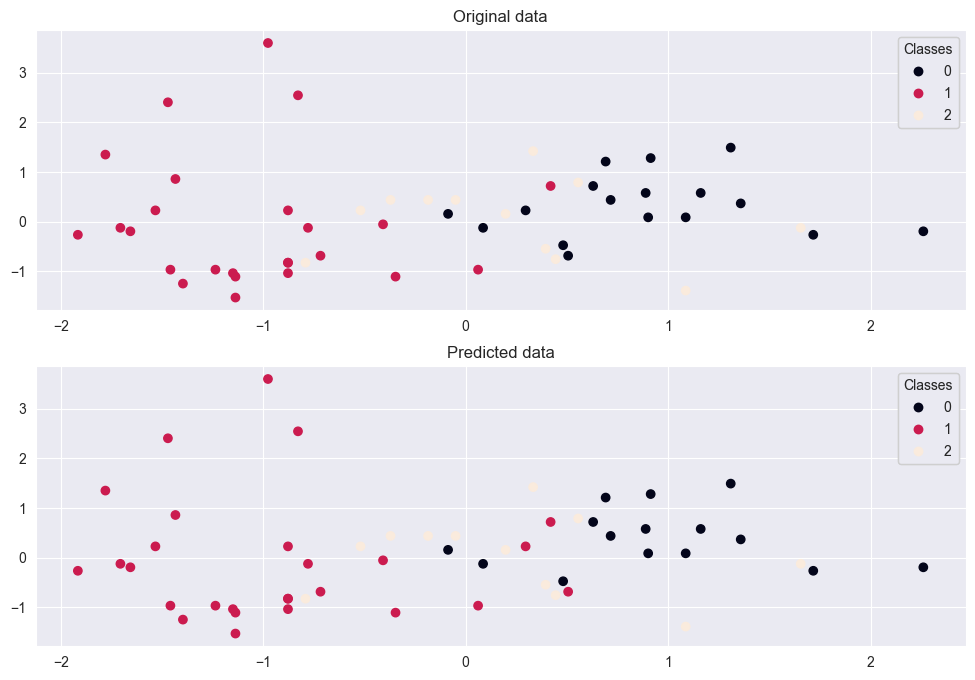

In [11]:
fig, axs = plt.subplots(2, 1, figsize=(12, 8))
scatter_0 = axs[0].scatter(X_test[:, 0], X_test[:, 4], c=y_test)
axs[0].set_title('Original data')
legend0 = axs[0].legend(*scatter_0.legend_elements(), title="Classes")
axs[0].add_artist(legend0)
scatter_1 = axs[1].scatter(X_test[:, 0], X_test[:, 4], c=y_pred)
axs[1].set_title('Predicted data')
legend1 = axs[1].legend(*scatter_1.legend_elements(), title="Classes")
axs[1].add_artist(legend1);

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=124)

In [35]:
model = GaussianNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [36]:
f1_val = f1_score(y_test, y_pred, average='micro')
print(f"F1-Score: {round(f1_val, 2)}")

F1-Score: 1.0


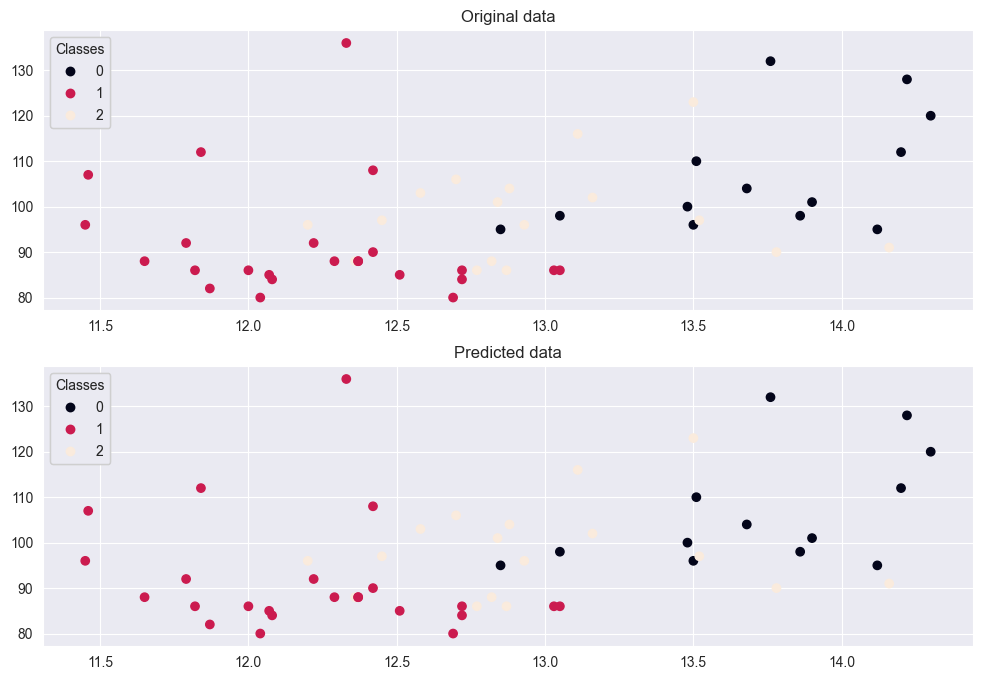

In [37]:
fig, axs = plt.subplots(2, 1, figsize=(12, 8))
scatter_0 = axs[0].scatter(X_test['alcohol'], X_test['magnesium'], c=y_test)
axs[0].set_title('Original data')
legend0 = axs[0].legend(*scatter_0.legend_elements(), title="Classes")
axs[0].add_artist(legend0)
scatter_1 = axs[1].scatter(X_test['alcohol'], X_test['magnesium'], c=y_pred)
axs[1].set_title('Predicted data')
legend1 = axs[1].legend(*scatter_1.legend_elements(), title="Classes")
axs[1].add_artist(legend1);

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X_scale, y, test_size=0.3, random_state=113)

In [46]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

In [47]:
accuracy = logreg.score(X_test, y_test)
print(f"Accuracy: {round(accuracy, 2)}")

Accuracy: 0.98


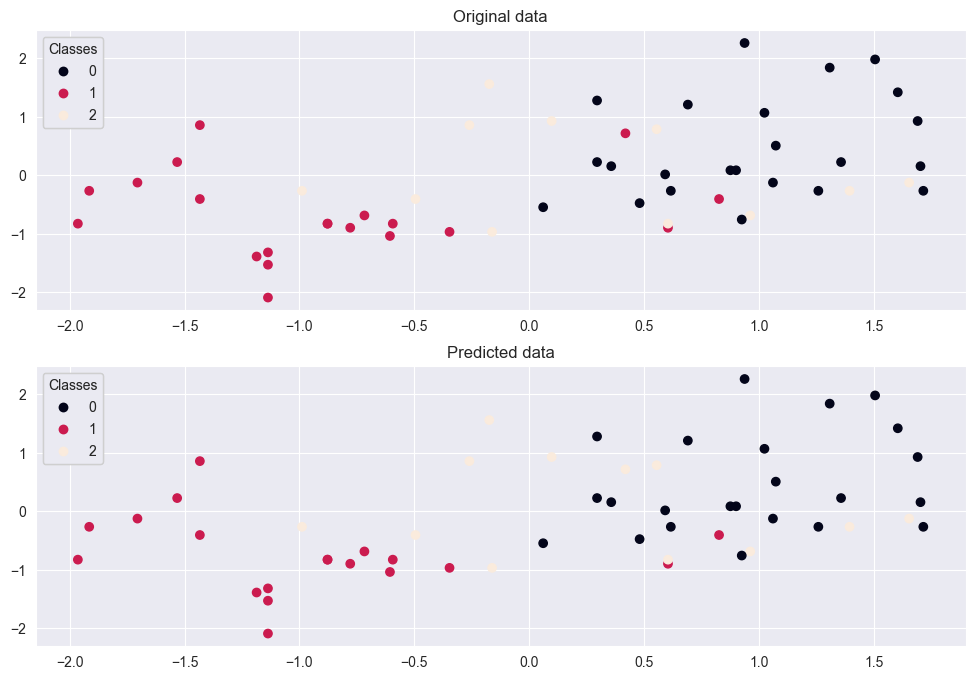

In [48]:
fig, axs = plt.subplots(2, 1, figsize=(12, 8))
scatter_0 = axs[0].scatter(X_test[:, 0], X_test[:, 4], c=y_test)
axs[0].set_title('Original data')
legend0 = axs[0].legend(*scatter_0.legend_elements(), title="Classes")
axs[0].add_artist(legend0)
scatter_1 = axs[1].scatter(X_test[:, 0], X_test[:, 4], c=y_pred)
axs[1].set_title('Predicted data')
legend1 = axs[1].legend(*scatter_1.legend_elements(), title="Classes")
axs[1].add_artist(legend1);